In [14]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns

In [2]:
df=pd.read_csv(r'https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv')
print(df.shape)

(891, 12)


In [3]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [4]:
df['Age'] = df['Age'].fillna(df.groupby('Pclass')['Age'].transform('median'))

In [5]:
df=df.drop('Cabin',axis=1)

In [6]:
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

In [7]:
def age_categories(age):
    if age <= 15:
        return 'Child'
    elif 16 <= age <= 30:
        return 'Young Adult'
    elif 31 <= age <= 45:
        return 'Adult'
    elif 46 <= age <= 60:
        return 'Middle Aged'
    else:
        return 'Senior'

df['AgeCategories'] = df['Age'].apply(age_categories)


In [ ]:
print(df.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Embarked AgeCategories  
0      0         A/5 21171   7.2500        S   Young Adult  
1      0          PC 17599  71.2833        C         Adult  
2      0  STON/O2. 3101282   7.9250        S   Young Adult  
3      0            113803  53.1000        S         Adult  
4      0       

In [23]:
df['FamilySize'] = df['SibSp'] + df['Parch']


def extract_title(name):
    if 'Mr.' in name:
        return 'Mr'
    elif 'Mrs.' in name:
        return 'Mrs'
    elif 'Miss.' in name:
        return 'Miss'
    elif 'Master.' in name:
        return 'Master'
    else:
        return 'Other'

df['Title'] = df['Name'].apply(extract_title)


df['FareRange'] = pd.cut(df['Fare'], bins=[0, 10, 30, 70, 100], labels=['Low', 'Medium', 'High', 'Very High'])
df['FarePerPerson'] = df['Fare'] / (df['FamilySize'] + 1)


print(df.head(3))


   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   

   Parch            Ticket     Fare Embarked AgeCategories  FamilySize Title  \
0      0         A/5 21171   7.2500        S   Young Adult           1    Mr   
1      0          PC 17599  71.2833        C         Adult           1   Mrs   
2      0  STON/O2. 3101282   7.9250        S   Young Adult           0  Miss   

   FareRange  FarePerPerson  
0        Low        3.62500  
1  Very High       35.64165  
2        Low        7.92500  


AttributeError: 'numpy.int64' object has no attribute 'startswith'

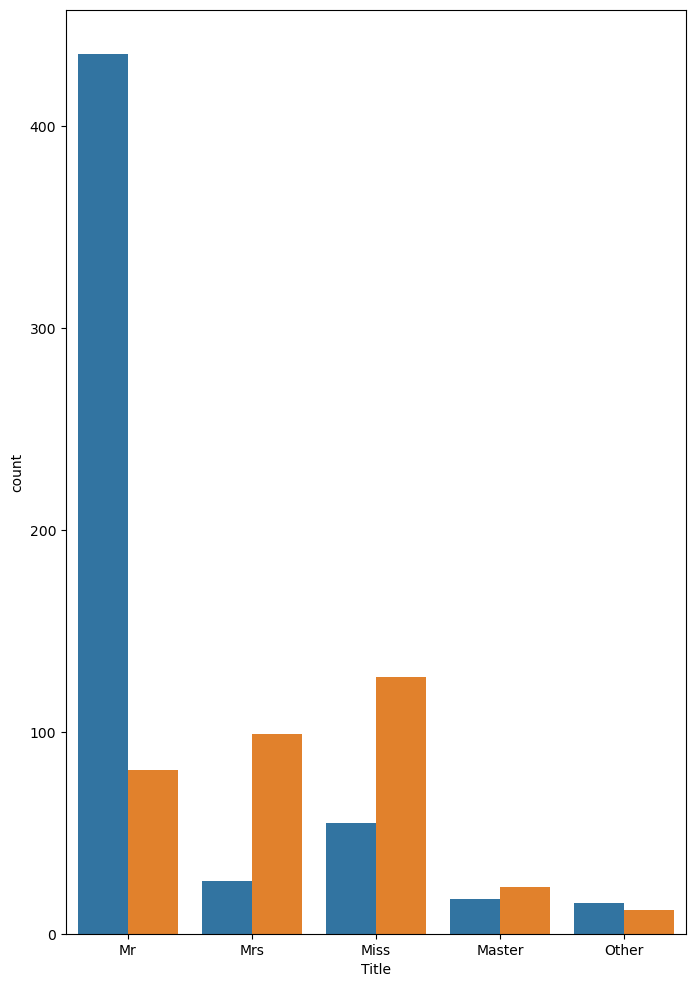

In [25]:
plt.figure(figsize=(8,12))
sns.countplot(data=df, x='Title', hue='Survived')
plt.title('Survival Count by Title')
plt.show()